## Observations and Insights 

In [625]:
# # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

# # Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# # Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # Combine the data into a single dataset
all_mouse_data = pd.merge(mouse_metadata, study_results, how ="left", on = ['Mouse ID', 'Mouse ID'])
# # Display the data table for preview

all_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [626]:
#number of mice
#get unique mice and count with nunique
mouse_amount = all_mouse_data["Mouse ID"].nunique()

mouse_amount

249

In [627]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#get only time and mouse id
mice_duplicates = all_mouse_data[["Mouse ID", "Timepoint"]]
mice_duplicates = mice_duplicates[mice_duplicates.duplicated()]

#print duplicate mice
mice_duplicates



,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [628]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

all_mouse_data = all_mouse_data[all_mouse_data["Mouse ID"] != "g989"]

all_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [629]:
# Checking the number of mice in the clean DataFrame.
mouse_amount = all_mouse_data["Mouse ID"].nunique()

mouse_amount

248

## Summary Statistics

In [630]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

#get only tumor and drug regimen
drug_regimen = all_mouse_data[["Drug Regimen", "Tumor Volume (mm3)"]]
drug_regimen =(drug_regimen.set_index(['Drug Regimen']))



# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_tumor_volume_median = (drug_regimen.groupby('Drug Regimen')["Tumor Volume (mm3)"].median())
drug_regimen_tumor_volume_variance = (drug_regimen.groupby('Drug Regimen')["Tumor Volume (mm3)"].var())
drug_regimen_tumor_volume_std = (drug_regimen.groupby('Drug Regimen')["Tumor Volume (mm3)"].std())
drug_regimen_tumor_volume_sem = (drug_regimen.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem())


# Assemble the resulting series into a single summary dataframe.

drug_regimen_tumor_volume_summary = drug_regimen.groupby(['Drug Regimen']).mean()
drug_regimen_tumor_volume_summary.columns = ["Tumor Volume Mean"]
drug_regimen_tumor_volume_summary["Tumor Volume Median"] = (drug_regimen_tumor_volume_median)
drug_regimen_tumor_volume_summary["Tumor Volume Variance"] = (drug_regimen_tumor_volume_variance)
drug_regimen_tumor_volume_summary["Tumor Volume Standard Dev"] = (drug_regimen_tumor_volume_std)
drug_regimen_tumor_volume_summary["Tumor Volume Standard Error"] = (drug_regimen_tumor_volume_sem)
drug_regimen_tumor_volume_summary





,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [631]:
# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen_agg = drug_regimen.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])



drug_regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

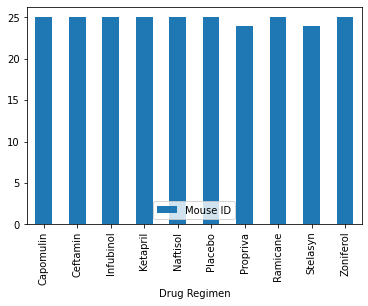

In [632]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#isolate needed columns for simplicity (or busy work depending on how u feelin it)
mouse_drugs = all_mouse_data[["Drug Regimen", "Mouse ID"]]

#get rid of duplicate mouse ids
mouse_unique = mouse_drugs.drop_duplicates()

#count unique ids by drug
mouse_unique=(mouse_unique.set_index(['Drug Regimen']))
mouse_unique = mouse_unique.groupby(["Drug Regimen"]).count()

#plot results
mouse_unique.plot.bar()

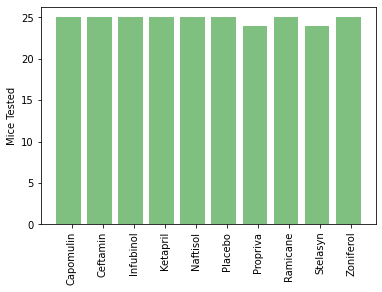

In [633]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#define tick amount and locatiion
x_axis = range(len(drug_regimen_tumor_volume_summary))
tick_value = [tick+.5 for tick in x_axis]

#save unique mice per drug count to y axis
y_axis = mouse_unique['Mouse ID']
#save drug names to tick labels
tick_labels = mouse_unique.index 

#plot results
plt.bar(x_axis, y_axis, color='g', alpha=0.5, align="edge")
plt.xticks(tick_value,tick_labels,rotation = "vertical")
plt.ylabel("Mice Tested")
plt.show()

array([<AxesSubplot:ylabel='Mouse ID'>], dtype=object)

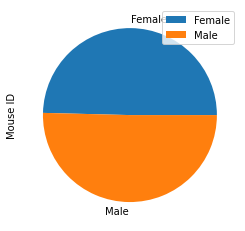

In [634]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender_ratio = all_mouse_data[["Sex", "Mouse ID"]]

#get rid of duplicate mouse ids
mouse_gender_ratio = mouse_gender_ratio.drop_duplicates()

#count unique ids by genda
mouse_gender_ratio=(mouse_gender_ratio.set_index(['Sex']))
mouse_gender_ratio = mouse_gender_ratio.groupby(["Sex"]).count()
#plot results
mouse_gender_ratio.plot.pie(subplots = True)


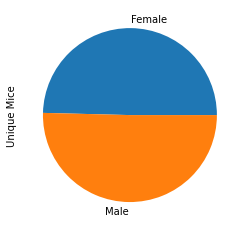

In [635]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


#save unique mice per gender to x
x = mouse_gender_ratio['Mouse ID']

#plot x with labels
plt.pie(x,labels = ["Female", "Male"])
plt.ylabel("Unique Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [636]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Create df with relevant paramaters 
tumor_growth = all_mouse_data[["Drug Regimen", "Mouse ID", 'Timepoint', "Tumor Volume (mm3)"]]
#isolate final timepoint per mouse
tumor_growth = tumor_growth.drop_duplicates(subset='Mouse ID', keep = "last")

#eliminate irrelevant drugs
tumor_growth = tumor_growth[(tumor_growth['Drug Regimen'] == "Capomulin") |
                            (tumor_growth['Drug Regimen'] == "Ramicane")  |
                            (tumor_growth['Drug Regimen'] == "Infubinol") |
                            (tumor_growth['Drug Regimen'] == "Ceftamin")]

tumor_growth

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
9,Ramicane,k403,45,22.050126
19,Capomulin,s185,45,23.343598
29,Capomulin,x401,45,28.484033
39,Capomulin,m601,45,28.430964
49,Ramicane,g791,45,29.128472
...,...,...,...,...
1797,Ceftamin,x822,45,61.386660
1813,Infubinol,y163,45,67.685569
1845,Ceftamin,y769,45,68.594745
1855,Ceftamin,y865,45,64.729837


In [637]:
# Put treatments into a list for for loop (and later for plot labels)
relevant_regimens = [drug for drug in (tumor_growth["Drug Regimen"]).unique()]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = tumor_growth["Tumor Volume (mm3)"].quantile(.25)
Q3 = tumor_growth["Tumor Volume (mm3)"].quantile(.75)  
IQR = Q3 - Q1
lower_bound = Q1 - IQR
upper_bound = Q3 +IQR

#get tumor volumes and append to tumor data list
for index, row in tumor_growth.iterrows():
    tumor_vol_data.append(row['Tumor Volume (mm3)'])

# Determine outliers using upper and lower bounds
outliers = []
for data_point in tumor_vol_data:
    if data_point > upper_bound or data_point < lower_bound:
        outliers.append(data_point)

outliers


[]

Text(0, 0.5, 'Tumor Size in mm3')

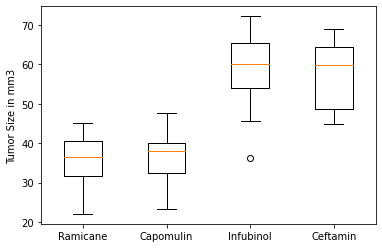

In [638]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumors = []
#get each drug from "relevant_regimes" and create list to store its tumor sizes
for drug in relevant_regimens:
    tumors_per =[]
    #get tumor sizes per drug
    for index, row in tumor_growth.iterrows():
        if row["Drug Regimen"] == drug:
            tumors_per.append(row['Tumor Volume (mm3)'])
    #append tumors_per list to tumor list,
    tumors.append(tumors_per)

#zip drugs and tumor sizes to dict    
tumors_per_drug_dict = dict(zip(relevant_regimens, tumors))


#plot the dict
fig, ax = plt.subplots()
ax.boxplot(tumors_per_drug_dict.values())
ax.set_xticklabels(tumors_per_drug_dict.keys())
ax.set_ylabel("Tumor Size in mm3")


## Line and Scatter Plots

,Drug Regimen,Timepoint,Tumor Volume (mm3),Mouse ID,Weight (g)
341,Capomulin,0,45.000000,v923,21
342,Capomulin,5,45.704434,v923,21
343,Capomulin,10,39.848223,v923,21
344,Capomulin,15,40.457989,v923,21
345,Capomulin,20,39.648296,v923,21
346,Capomulin,25,40.156413,v923,21
347,Capomulin,30,40.752216,v923,21
348,Capomulin,35,41.439242,v923,21
349,Capomulin,40,42.151015,v923,21
350,Capomulin,45,40.658124,v923,21


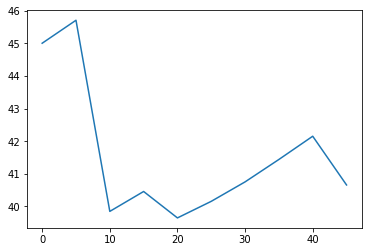

In [639]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#get relevant columns
capomulin_data = all_mouse_data[["Drug Regimen", "Timepoint", 'Tumor Volume (mm3)',"Mouse ID","Weight (g)"]]
#get only capolimin drug regimens
capomulin_data = capomulin_data[capomulin_data['Drug Regimen'] == "Capomulin"]
#isolate one mouse from capomulin_data randomly
capomulin_data_isolated_mouse_tumor = capomulin_data[capomulin_data['Mouse ID'] == 
                                               capomulin_data.iloc[(random.randint(0,len(capomulin_data)-1))]["Mouse ID"]]

#save x and y variables and plottem'
x = capomulin_data_isolated_mouse_tumor['Timepoint']
y = capomulin_data_isolated_mouse_tumor['Tumor Volume (mm3)']

plt.plot(x,y)

capomulin_data_isolated_mouse_tumor

,Timepoint,Tumor Volume (mm3)
Weight (g),,
15,22.500000,36.182040
17,21.538462,37.214133
19,22.500000,41.182391
20,22.500000,39.141053
21,21.666667,42.088700
22,22.500000,43.288490
23,20.217391,43.341051
24,22.500000,44.805810
25,18.214286,44.062109


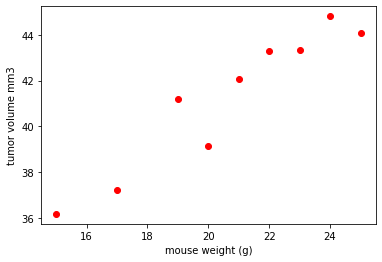

In [640]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data_per_weight = capomulin_data.set_index(['Weight (g)'])

#groupby wiehgt
capomulin_data_per_weight = capomulin_data_per_weight.groupby(['Weight (g)']).mean()

#set x and y varibles and plottem'
x = capomulin_data_per_weight.index
y = capomulin_data_per_weight['Tumor Volume (mm3)']
plt.scatter(x,y, color = 'r')
plt.xlabel("mouse weight (g)")
plt.ylabel("tumor volume mm3")

capomulin_data_per_weight

## Correlation and Regression

correlation coefficient is 0.950524396
highly correlated


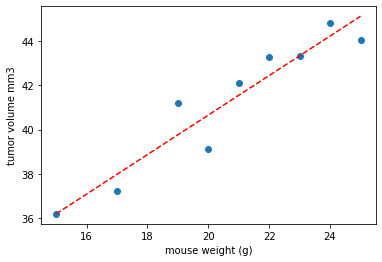

In [643]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(x,y)
plt.xlabel("mouse weight (g)")
plt.ylabel("tumor volume mm3")

#get linear regression
slope, intercept, r, p, sem = st.linregress(x, y)
#make variable to hold graphed regression
fit = slope * x + intercept
#plot the variable
plt.plot(x, fit, '--', color ="r")
#get the correlation coefficieny and print it
corr = round(st.pearsonr(x,y)[0],9)
print(f"correlation coefficient is {corr}")
if corr > .7:
    print('highly correlated')